<a href="https://colab.research.google.com/github/aparna-2001/medical-insurance-charges-ML-model-2021-2025/blob/main/Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, classification_report,
                              confusion_matrix, roc_auc_score, roc_curve)
import seaborn as sns

In [3]:
medical_df_clean = pd.read_csv('medical_df_clean.csv')

In [4]:
X = medical_df_clean.drop(columns=['charges'])
y = medical_df_clean['charges']

print(f"Features : {X.shape[1]}")
print(f"Rows     : {X.shape[0]}")
print(X.columns.tolist())

Features : 9
Rows     : 1337
['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest', 'age_smoker_interaction']


In [5]:

train_x, test_x, train_y, test_y = train_test_split(
    X, y,
    train_size=0.8,
    random_state= 100
)

print(f"Train : {train_x.shape}")
print(f"Test  : {test_y.shape}")

Train : (1069, 9)
Test  : (268,)


In [6]:
rf_model = RandomForestRegressor(
    n_estimators=100,    # number of trees
    random_state=100,     # reproducibility
    n_jobs=-1            # use all CPU cores
)

rf_model.fit(train_x, train_y)
print("Training complete")

Training complete


**Prediction**

In [7]:
y_pred_train = rf_model.predict(train_x)  # training predictions
y_pred_test  = rf_model.predict(test_x)   # test predictions

**Evaluation**

In [8]:
# Training performance
train_r2   = r2_score(train_y, y_pred_train)
train_mae  = mean_absolute_error(train_y, y_pred_train)
train_rmse = np.sqrt(mean_squared_error(train_y, y_pred_train))

# Test performance
test_r2   = r2_score(test_y, y_pred_test)
test_mae  = mean_absolute_error(test_y, y_pred_test)
test_rmse = np.sqrt(mean_squared_error(test_y, y_pred_test))

print("=" * 45)
print(f"{'Metric':<15} {'Train':>12} {'Test':>12}")
print("=" * 45)
print(f"{'R²':<15} {train_r2:>12.4f} {test_r2:>12.4f}")
print(f"{'MAE':<15} {train_mae:>12.2f} {test_mae:>12.2f}")
print(f"{'RMSE':<15} {train_rmse:>12.2f} {test_rmse:>12.2f}")
print("=" * 45)


Metric                 Train         Test
R²                    0.9756       0.8409
MAE                  1037.71      2733.99
RMSE                 1907.88      4643.65


* The model is performing 13.5% better on training data than test data

* This may be due to overfitting

* Healthy gap   →  Train R² vs Test R² difference < 0.05
* Observed gap      →  0.1347  ← needs fixing

*Fixing overfitting*

In [9]:
rf_model_2 = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,           # limiting tree depth
    min_samples_leaf=4,     # minimum samples at leaf node
    min_samples_split=10,   # minimum samples to split a node
    random_state=100,
    n_jobs=-1
)

rf_model_2.fit(train_x, train_y)
print("Training complete")

Training complete


In [10]:
y_pred_train_2 = rf_model_2.predict(train_x)  # training predictions
y_pred_test_2  = rf_model_2.predict(test_x)   # test predictions

In [11]:
#evaluation

# Training performance
train_r2_2   = r2_score(train_y, y_pred_train_2)
train_mae_2  = mean_absolute_error(train_y, y_pred_train)
train_rmse_2 = np.sqrt(mean_squared_error(train_y, y_pred_train_2))

# Test performance
test_r2_2  = r2_score(test_y, y_pred_test_2)
test_mae_2  = mean_absolute_error(test_y, y_pred_test_2)
test_rmse_2 = np.sqrt(mean_squared_error(test_y, y_pred_test_2))

print("=" * 45)
print(f"{'Metric':<15} {'Train':>12} {'Test':>12}")
print("=" * 45)
print(f"{'R²':<15} {train_r2_2:>12.4f} {test_r2_2:>12.4f}")
print(f"{'MAE':<15} {train_mae_2:>12.2f} {test_mae_2:>12.2f}")
print(f"{'RMSE':<15} {train_rmse_2:>12.2f} {test_rmse_2:>12.2f}")
print("=" * 45)


Metric                 Train         Test
R²                    0.9100       0.8647
MAE                  1037.71      2464.00
RMSE                 3666.39      4282.69


* Test R²   : 0.8409 to 0.8647  ; better generalisation
* Test MAE  : 2733   to 2464    
* Test RMSE : 4643   to 4282    ; extreme errors reduced
* R² gap    : 0.1347 to 0.0453  ; overfitting significantly reduced

* OLS best       to  R² = 0.751
* Random Forest  to  R² = 0.8647 : (+11.4% improvement)
* Gap            to  0.0453        

**Important features**

                  Feature  Importance
4              smoker_yes    0.615429
1                     bmi    0.213889
0                     age    0.121381
2                children    0.017312
8  age_smoker_interaction    0.011192
3                sex_male    0.005920
5        region_northwest    0.005444
6        region_southeast    0.005131
7        region_southwest    0.004302


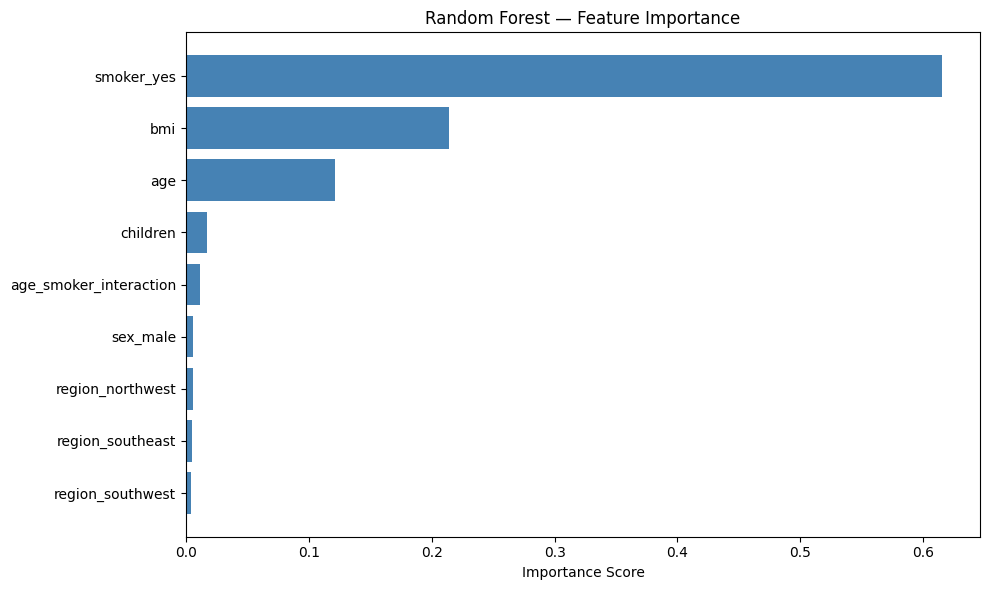

In [12]:
importance_df = pd.DataFrame({
    'Feature'   : X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(importance_df)

# Visualise
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][::-1],
         importance_df['Importance'][::-1],
         color='steelblue')
plt.xlabel('Importance Score')
plt.title('Random Forest — Feature Importance')
plt.tight_layout()
plt.show()


* Three factors dominates the charge;
    * smoker_yes
    * bmi
    * age

* This will be the most crucial elements in deciding the charges for an insurance company

**Residual plot**

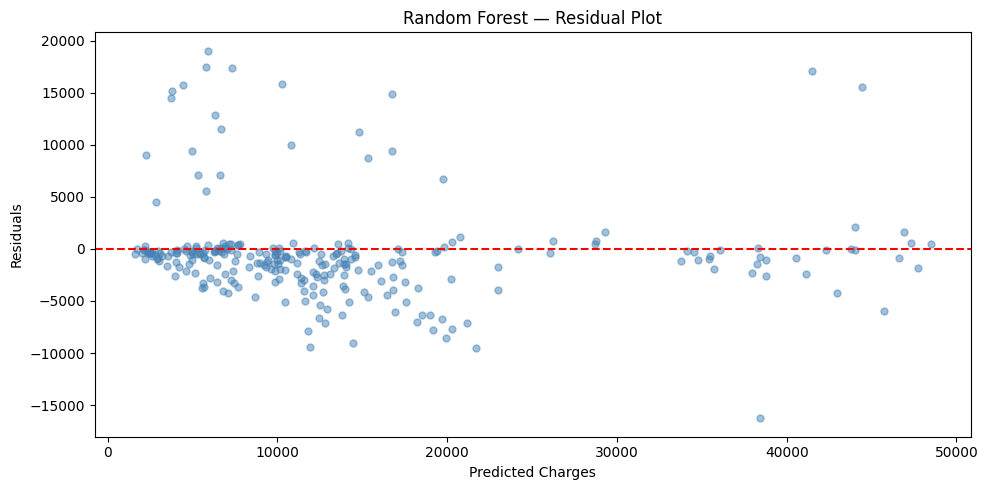

In [13]:
residuals = test_y - y_pred_test

plt.figure(figsize=(10, 5))
plt.scatter(y_pred_test, residuals, alpha=0.5, color='steelblue', s=25)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Random Forest — Residual Plot')
plt.tight_layout()
plt.show()


**Comparison with OLS**

* Distinct clusters are not visible

* Skewness reduced

* Heteroscedasticity still present, but not severe as in OLS

In [14]:
comparison_table = pd.DataFrame({
    'Metric': [
        'R² Train', 'R² Test', 'MAE Train', 'MAE Test',
        'RMSE Train', 'RMSE Test', 'R² Gap',
        'Skew', 'Kurtosis', 'Durbin-Watson', 'Jarque-Bera', 'Observations'
    ],
    'OLS Full': [
        '-', 0.751, '-', '-', '-', '-', '-',
        1.228, 5.553, 1.980, 559.087, 1069
    ],
    'OLS Reduced': [
        '-', 0.749, '-', '-', '-', '-', '-',
        1.227, 5.528, 1.971, 553.035, 1069
    ],
    'OLS Cooks': [
        '-', 0.747, '-', '-', '-', '-', '-',
        1.277, 5.863, 2.123, 583.182, 951
    ],
    'OLS VIF Fixed': [
        '-', 0.751, '-', '-', '-', '-', '-',
        1.210, 5.641, 2.093, 714.823, 1337
    ],
    'RF Default': [
        0.9756, 0.8409, 1037.71, 2733.99,
        1907.88, 4643.65, 0.1347,
        '-', '-', '-', '-', 1337
    ],
    'RF Tuned': [
        0.9100, 0.8647, 1037.71, 2464.00,
        3666.39, 4282.69, 0.0453,
        '-', '-', '-', '-', 1337
    ],
    'Gradient Boosting': [
        '-', '-', '-', '-', '-', '-', '-',
        '-', '-', '-', '-', '-'
    ]
})

comparison_table.set_index('Metric', inplace=True)
comparison_table

,OLS Full,OLS Reduced,OLS Cooks,OLS VIF Fixed,RF Default,RF Tuned,Gradient Boosting
Metric,,,,,,,
R² Train,-,-,-,-,0.9756,0.91,-
R² Test,0.751,0.749,0.747,0.751,0.8409,0.8647,-
MAE Train,-,-,-,-,1037.71,1037.71,-
MAE Test,-,-,-,-,2733.99,2464.0,-
RMSE Train,-,-,-,-,1907.88,3666.39,-
RMSE Test,-,-,-,-,4643.65,4282.69,-
R² Gap,-,-,-,-,0.1347,0.0453,-
Skew,1.228,1.227,1.277,1.21,-,-,-
Kurtosis,5.553,5.528,5.863,5.641,-,-,-


**Classification of smoker**

*Predicting if someone is a smoker*

In [18]:
x_for_smoker = medical_df_clean.drop(columns = ['charges', 'smoker_yes', 'age_smoker_interaction'])
y_for_smoker = medical_df_clean['smoker_yes']


print(f"Features : {x_for_smoker.shape[1]}")
print(f"Rows     : {y_for_smoker.shape[0]}")
print(x_for_smoker.columns.tolist())

Features : 7
Rows     : 1337
['age', 'bmi', 'children', 'sex_male', 'region_northwest', 'region_southeast', 'region_southwest']


In [21]:

train_x_for_smoker, test_x_for_smoker, train_y_for_smoker, test_y_for_smoker = train_test_split(
    x_for_smoker,
    y_for_smoker,
    train_size=0.8,
    random_state= 100
)

print(f"Train : {train_x_for_smoker.shape}")
print(f"Test  : {test_y_for_smoker.shape}")

Train : (1069, 7)
Test  : (268,)


In [24]:

# training a new RandomForestClassifier for smoker prediction
rf_classifier_model = RandomForestClassifier(
    n_estimators=100,
    random_state=100,
    n_jobs=-1
)

rf_classifier_model.fit(train_x_for_smoker, train_y_for_smoker)
print("Classifier training complete")


Classifier training complete


In [31]:

# Making predictions with the new classifier
y_pred_train_for_smoker = rf_classifier_model.predict(train_x_for_smoker)  # training predictions
y_pred_test_for_smoker  = rf_classifier_model.predict(test_x_for_smoker)   # test predictions

In [34]:

# Predictions
y_pred_train_for_smoker = rf_classifier_model.predict(train_x_for_smoker)  # training predictions
y_pred_test_for_smoker  = rf_classifier_model.predict(test_x_for_smoker)

# Probabilities for ROC AUC
y_proba_train_clf = rf_classifier_model.predict_proba(train_x_for_smoker)[:, 1]
y_proba_test_clf  = rf_classifier_model.predict_proba(test_x_for_smoker)[:, 1]

# Metrics
train_acc = accuracy_score(train_y_for_smoker, y_pred_train_for_smoker)
test_acc  = accuracy_score(test_y_for_smoker,  y_pred_test_for_smoker)

train_auc = roc_auc_score(train_y_for_smoker, y_proba_train_clf)
test_auc  = roc_auc_score(test_y_for_smoker,  y_proba_test_clf)

print("=" * 50)
print(f"{'Metric':<15} {'Train':>12} {'Test':>12}")
print("-" * 50)
print(f"{'Accuracy':<15} {train_acc:>12.4f} {test_acc:>12.4f}")
print(f"{'ROC AUC':<15} {train_auc:>12.4f} {test_auc:>12.4f}")
print(f"{'Gap (Acc)':<15} {abs(train_acc - test_acc):>12.4f}")
print("=" * 50)

Metric                 Train         Test
--------------------------------------------------
Accuracy              0.9991       0.7724
ROC AUC               1.0000       0.5039
Gap (Acc)             0.2267


* The model performs very good on training data. but poor in test data. This shows overfitting

In [35]:
# Classification Report
print("Classification Report (Test Set):")
print(classification_report(test_y_for_smoker, y_pred_test_for_smoker,
                             target_names=['Non-Smoker', 'Smoker']))

Classification Report (Test Set):
              precision    recall  f1-score   support

  Non-Smoker       0.81      0.94      0.87       217
      Smoker       0.22      0.08      0.12        51

    accuracy                           0.77       268
   macro avg       0.52      0.51      0.49       268
weighted avg       0.70      0.77      0.73       268



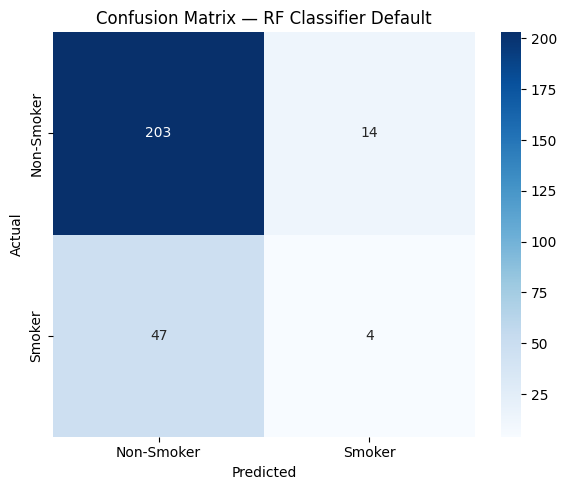

In [38]:
# Confusion Matrix
cm = confusion_matrix(test_y_for_smoker, y_pred_test_for_smoker)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Smoker', 'Smoker'],
            yticklabels=['Non-Smoker', 'Smoker'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix — RF Classifier Default')
plt.tight_layout()
plt.show()

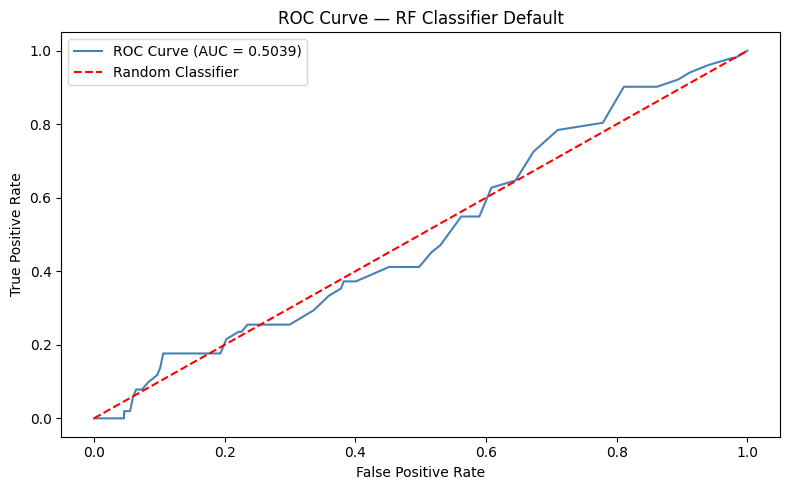

In [40]:
# ROC Curve
fpr, tpr, _ = roc_curve(test_y_for_smoker, y_proba_test_clf)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='steelblue',
         label=f'ROC Curve (AUC = {test_auc:.4f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve — RF Classifier Default')
plt.legend()
plt.tight_layout()
plt.show()



* From the confusion matrix, we can see Out of 51 actual smokers the model only caught 4, missing 47 smokers completely. That's a 92% miss rate on smokers.

* smoker recall explains only 8% of actual smokers

* ROC CURVE ; The blue line is hugging the red random classifier line almost perfectly ,meaning the model has zero discriminative ability between smokers and non-smokers on test data despite 99.9% train accuracy

CAUSES

* Overfitting

* class imbalance

* removal of charges

In [41]:
x_with_charge = medical_df_clean.drop(columns = [ 'smoker_yes', 'age_smoker_interaction'])
y_with_charge = medical_df_clean['smoker_yes']


print(f"Features : {x_with_charge.shape[1]}")
print(f"Rows     : {y_with_charge.shape[0]}")
print(x_with_charge.columns.tolist())

Features : 8
Rows     : 1337
['age', 'bmi', 'children', 'charges', 'sex_male', 'region_northwest', 'region_southeast', 'region_southwest']


In [42]:

train_x_with_charge, test_x_with_charge, train_y_with_charge, test_y_with_charge = train_test_split(
    x_with_charge,
    y_with_charge,
    train_size=0.8,
    random_state= 100
)

print(f"Train : {train_x_with_charge.shape}")
print(f"Test  : {test_y_with_charge.shape}")

Train : (1069, 8)
Test  : (268,)


In [43]:
# training a new RandomForestClassifier for smoker prediction with charge
rf_classifier_model = RandomForestClassifier(
    n_estimators=100,
    random_state=100,
    n_jobs=-1
)

rf_classifier_model.fit(train_x_with_charge,
                        train_y_with_charge)
print("Classifier training complete")

Classifier training complete


In [44]:
# Making predictions with the new classifier

y_pred_train_with_charge = rf_classifier_model.predict(train_x_with_charge)  # training predictions
y_pred_test_with_charge  = rf_classifier_model.predict(test_x_with_charge)   # test predictions

In [45]:

# Predictions
y_pred_train_with_charge = rf_classifier_model.predict(train_x_with_charge)  # training predictions
y_pred_test_with_charge  = rf_classifier_model.predict(test_x_with_charge)

# Probabilities for ROC AUC
y_proba_train_clf_with_charge = rf_classifier_model.predict_proba(train_x_with_charge)[:, 1]
y_proba_test_clf_with_charge = rf_classifier_model.predict_proba(test_x_with_charge)[:, 1]

# Metrics
train_acc_with_charge = accuracy_score(train_y_with_charge, y_pred_train_with_charge)
test_acc_with_charge = accuracy_score(test_y_with_charge,  y_pred_test_with_charge)

train_auc_with_charge = roc_auc_score(train_y_with_charge, y_proba_train_clf_with_charge)
test_auc_with_charge = roc_auc_score(test_y_with_charge,  y_proba_test_clf_with_charge)

print("=" * 50)
print(f"{'Metric':<15} {'Train':>12} {'Test':>12}")
print("-" * 50)
print(f"{'Accuracy':<15} {train_acc_with_charge:>12.4f} {test_acc_with_charge:>12.4f}")
print(f"{'ROC AUC':<15} {train_auc_with_charge :>12.4f} {test_auc_with_charge:>12.4f}")
print(f"{'Gap (Acc)':<15} {abs(train_acc_with_charge - test_acc_with_charge):>12.4f}")
print("=" * 50)

Metric                 Train         Test
--------------------------------------------------
Accuracy              1.0000       0.9552
ROC AUC               1.0000       0.9941
Gap (Acc)             0.0448


In [47]:
# Classification Report
print("Classification Report (Test Set):")
print(classification_report(test_y_with_charge,
                            y_pred_test_with_charge,
                             target_names=['Non-Smoker', 'Smoker']))

Classification Report (Test Set):
              precision    recall  f1-score   support

  Non-Smoker       0.97      0.97      0.97       217
      Smoker       0.88      0.88      0.88        51

    accuracy                           0.96       268
   macro avg       0.93      0.93      0.93       268
weighted avg       0.96      0.96      0.96       268



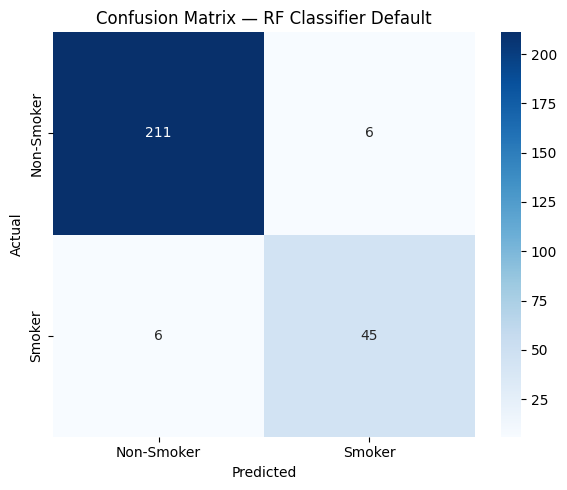

In [48]:
# Confusion Matrix
cm = confusion_matrix(test_y_with_charge,
                      y_pred_test_with_charge)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Smoker', 'Smoker'],
            yticklabels=['Non-Smoker', 'Smoker'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix — RF Classifier Default')
plt.tight_layout()
plt.show()

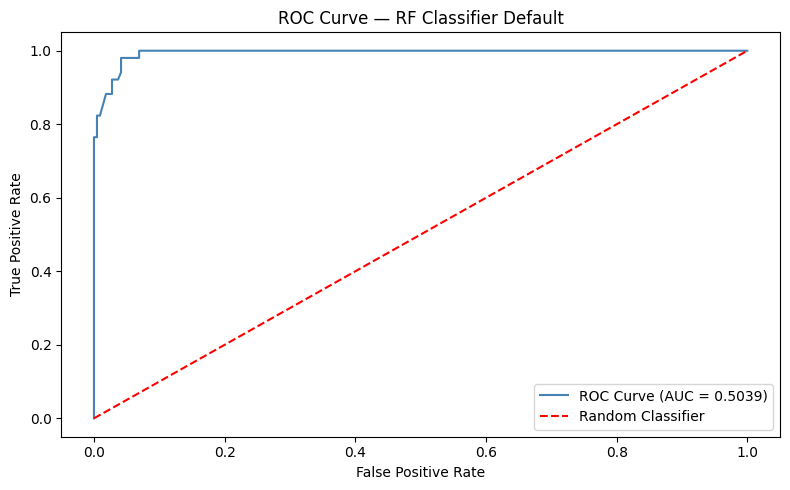

In [50]:
# ROC Curve
fpr, tpr, _ = roc_curve(test_y_with_charge,
                        y_proba_test_clf_with_charge)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='steelblue',
         label=f'ROC Curve (AUC = {test_auc:.4f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve — RF Classifier Default')
plt.legend()
plt.tight_layout()
plt.show()

* performs well on test data

* recall of smoker is 88%

* from confusion matrix, from total 51 smokers, the model identified 45 correctly

* AUC has been improved to near perfect discrimination between smokers and non smokers

In [51]:
clf_comparison = pd.DataFrame({
    'Metric': [
        'Train Accuracy', 'Test Accuracy', 'Accuracy Gap',
        'Train ROC AUC', 'Test ROC AUC',
        'Non-Smoker Precision', 'Non-Smoker Recall', 'Non-Smoker F1',
        'Smoker Precision', 'Smoker Recall', 'Smoker F1',
        'Overall Accuracy', 'Macro Avg F1', 'Weighted Avg F1'
    ],
    'RF Classifier (Without Charges)': [
        0.9991, 0.7724, 0.2267,
        1.0000, 0.5039,
        0.81, 0.94, 0.87,
        0.22, 0.08, 0.12,
        0.77, 0.49, 0.73
    ],
    'RF Classifier (With Charges)': [
        1.0000, 0.9552, 0.0448,
        1.0000, 0.9941,
        0.97, 0.97, 0.97,
        0.88, 0.88, 0.88,
        0.96, 0.93, 0.96
    ]
})

clf_comparison.set_index('Metric', inplace=True)
clf_comparison

,RF Classifier (Without Charges),RF Classifier (With Charges)
Metric,,
Train Accuracy,0.9991,1.0000
Test Accuracy,0.7724,0.9552
Accuracy Gap,0.2267,0.0448
Train ROC AUC,1.0000,1.0000
Test ROC AUC,0.5039,0.9941
Non-Smoker Precision,0.8100,0.9700
Non-Smoker Recall,0.9400,0.9700
Non-Smoker F1,0.8700,0.9700
Smoker Precision,0.2200,0.8800


*conclusion*


An insurance company that has access to someone's medical charges can identify with 99.4% AUC whether they are a smoker, making this a powerful fraud detection tool for identifying customers who lied about smoking on their application.

moving on to gradient boosting...